# Detecting Payment Card Fraud

In this section, we'll look at a credit card fraud detection dataset, and build an classification model that can identify transactions as either fraudulent or valid, based on provided, *historical* data. In a [2016 study](https://nilsonreport.com/upload/content_promo/The_Nilson_Report_10-17-2016.pdf), it was estimated that credit card fraud was responsible for over 20 billion dollars in loss, worldwide. Accurately detecting cases of fraud is an ongoing area of research.

<img src=notebook_ims/fraud_detection.png width=50% />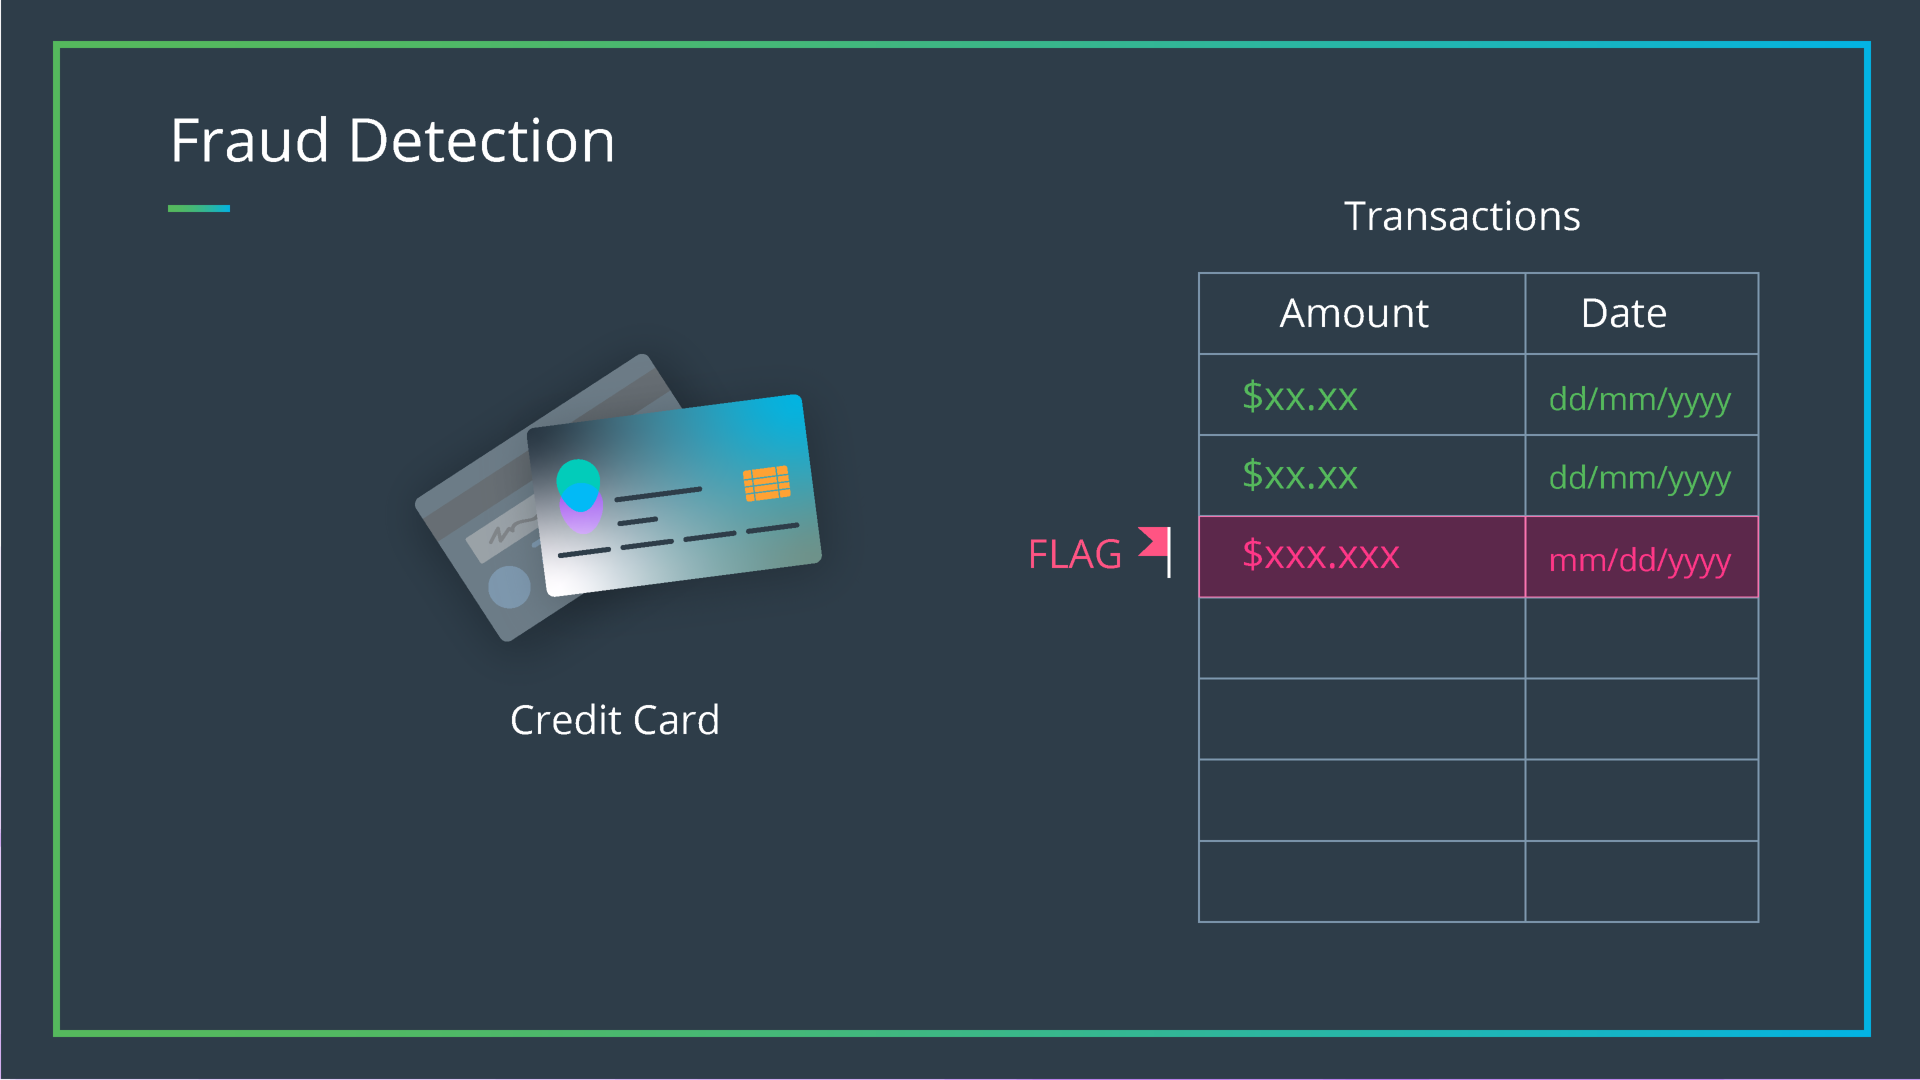

### Labeled Data

The payment fraud data set (Dal Pozzolo et al. 2015) was downloaded from [Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud/data). This has features and labels for thousands of credit card transactions, each of which is labeled as fraudulent or valid. In this notebook, we'd like to train a model based on the features of these transactions so that we can predict risky or fraudulent transactions in the future.

### Binary Classification

Since we have true labels to aim for, we'll take a **unsupervised learning** approach and train a binary classifier to sort data into one of our two transaction classes: fraudulent or valid.  We'll train a model on training data and see how well it generalizes on some test data.

The notebook will be broken down into a few steps:
* Loading and exploring the data
* Splitting the data into train/test sets
* Defining and training the model
* Making improvements on the model
* Evaluating and comparing model test performance



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Preparing the data

First lets drop the Time column (since we are not going to make use of it) and use the Scikit's learn StandardScaler on the Amount . The Scaler removes means and scale the values to unit variance

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


data = pd.read_csv("creditcard.csv")
data = data.drop(['Time'],axis = 1)




In [5]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
data.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [7]:
data.Amount

0         149.62
1           2.69
2         378.66
3         123.50
4          69.99
5           3.67
6           4.99
7          40.80
8          93.20
9           3.68
10          7.80
11          9.99
12        121.50
13         27.50
14         58.80
15         15.99
16         12.99
17          0.89
18         46.80
19          5.00
20        231.71
21         34.09
22          2.28
23         22.75
24          0.89
25         26.43
26         41.88
27         16.00
28         33.00
29         12.99
           ...  
284777      1.00
284778     80.00
284779     25.00
284780     30.00
284781     13.00
284782     12.82
284783     11.46
284784     40.00
284785      1.79
284786      8.95
284787      9.99
284788      3.99
284789     60.50
284790      9.81
284791     20.32
284792      3.99
284793      4.99
284794      0.89
284795      9.87
284796     60.00
284797      5.49
284798     24.05
284799     79.99
284800      2.68
284801      2.69
284802      0.77
284803     24.79
284804     67.

In [8]:
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data.Amount.values.reshape(-1,1))




In [9]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


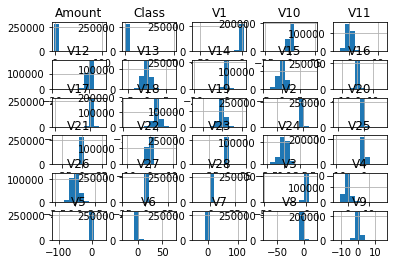

<Figure size 1440x864 with 0 Axes>

In [78]:
data.hist()
plt.figure(figsize =(20,12) )
plt.show()

Training our autoencoder is going to be a little bit different from what we are used to. Let's say you have a dataset containing a list of non fraudulent transactions at hand. You want to detect any anomaly in new transactions. We will create this situation by training our model on normal transactions only. Reserving the correct class on the test set will give us a way to evaluate the performance of our model we will reserve 20% of our data for testing

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test = train_test_split(data,test_size = 0.2)
X_train = X_train[X_train.Class == 0]
X_train = X_train.drop(['Class'], axis = 1)

y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis = 1)

X_train = X_train.values
X_test = X_test.values

In [11]:
X_train.shape

(227455, 29)

## Building the Model

Our Autoencoder uses 4 fully connected layers with 14,7,7 and 29 neurons respectively. The first two layers are used for our encoder,the last two go for the decoder. Additionally,L1 regularization will be used during training 

In [12]:
#import dependies
from keras import regularizers
from keras.layers import Dense
from keras.models import Model,Input
from keras.callbacks import ModelCheckpoint,TensorBoard
from keras.optimizers import Adam
import os

Using TensorFlow backend.


In [13]:
input_layer = Input(shape = (X_train.shape[1],))

encoder = Dense(14,activation ="tanh",activity_regularizer= regularizers.l1(10e-5))(input_layer)

encoder = Dense(7,activation = "relu")(encoder)

decoder = Dense(7, activation = "tanh")(encoder)

decoder = Dense(X_train.shape[1], activation = "relu")(decoder)

autoencoder = Model(inputs = input_layer,outputs = decoder)


encoded = Model(input_layer,encoder)



Lets train our model for 100 epochs with a batch size of 32 samples and save the best performing model to the file. The ModelCheckpoint provided by Keras is really handy for such tasks. Additionally, the training progress will be exported in a format that TensorBoard understands

In [14]:
#Directory in which to create the model
save_direc = os.path.join(os.getcwd(), 'fraudsavemodel')

#Name of Model files
model_name = "fraudmodel.{epoch:03d}.h5"

#Create Directory if it doesn't exist
if not os.path.isdir(save_direc):
  os.makedirs(save_direc)
#join the directory with the model file
modelpath = os.path.join(save_direc,model_name)

In [15]:
num_epochs = 100
batch_size = 32

autoencoder.compile(optimizer = 'adam',
                    loss = 'mean_squared_error',
                    metrics = ['accuracy'])

checkpointer = ModelCheckpoint(filepath = "modelpath",
                               verbose = 0,
                               save_best_only = True)

tensorboard = TensorBoard(log_dir ='./logs'
                          ,histogram_freq = 0 ,
                          write_graph = True,
                          write_images = True )

history = autoencoder.fit(X_train,X_train,
                          epochs = num_epochs,
                          batch_size = batch_size,shuffle = True,
                          validation_data = (X_test,X_test),verbose = 1,
                          callbacks = [checkpointer,tensorboard]).history

Train on 227455 samples, validate on 56962 samples
Epoch 1/100
227455/227455 [==============================] - 11s 50us/step - loss: 0.8050 - acc: 0.5939 - val_loss: 0.8183 - val_acc: 0.6541
Epoch 2/100
227455/227455 [==============================] - 13s 59us/step - loss: 0.7429 - acc: 0.6574 - val_loss: 0.8058 - val_acc: 0.6637
Epoch 3/100
227455/227455 [==============================] - 13s 58us/step - loss: 0.7358 - acc: 0.6648 - val_loss: 0.8020 - val_acc: 0.6650
Epoch 4/100
227455/227455 [==============================] - 13s 56us/step - loss: 0.7327 - acc: 0.6681 - val_loss: 0.8053 - val_acc: 0.6584
Epoch 5/100
227455/227455 [==============================] - 12s 51us/step - loss: 0.7313 - acc: 0.6705 - val_loss: 0.8001 - val_acc: 0.6609
Epoch 6/100
227455/227455 [==============================] - 13s 59us/step - loss: 0.7282 - acc: 0.6733 - val_loss: 0.7958 - val_acc: 0.6708
Epoch 7/100
227455/227455 [==============================] - 13s 58us/step - loss: 0.7245 - acc: 0.6755

In [16]:
#Determine number of Fraud cases in dataset
Fraud = data[data['Class'] == 1]
Valid = data[data['Class'] == 0]

outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)

print('Fraud Cases:{}'.format(len(Fraud)))
print('Valid Cases:{}'.format(len(Valid)))



0.0017304750013189597
Fraud Cases:492
Valid Cases:284315
